# Introduction :

**The goal of this notebook is to predict the credit risk of individuals based on their financial and demographic information using the German Credit Data dataset. Credit risk prediction is crucial for financial institutions to make informed decisions about lending, aiming to minimize the risk of default and optimize the approval process.**

**The dataset contains information about 1000 individuals, including their age, gender, job type, housing status, savings, checking accounts, credit amount, loan duration, and purpose of the loan. The task is to analyze these features and build a machine learning model that can predict whether a person is likely to be a high-risk or low-risk borrower.**

# 1. Import Libraries

We start by importing the necessary libraries for data manipulation, visualization, and modeling.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# 2. Load and Preview the Data

Load the dataset and take a look at the first few rows to understand its structure.

In [2]:
# Load the dataset
df = pd.read_csv('german_credit_data.csv')

# Display the first few rows of the dataset
df.head()


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


# 3. Data Preprocessing

We need to handle missing values and encode categorical variables into numerical formats.

In [3]:
# Handling missing values by filling with a placeholder or a statistical value
df = df.copy() 
df['Saving accounts'] = df['Saving accounts'].fillna('unknown')
df['Checking account'] = df['Checking account'].fillna('unknown')

# Encode categorical variables
label_encoders = {}
for column in ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Display the cleaned and encoded dataset
df.head()


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,1,2,1,4,0,1169,6,5
1,1,22,0,2,1,0,1,5951,48,5
2,2,49,1,1,1,0,3,2096,12,3
3,3,45,1,2,0,0,0,7882,42,4
4,4,53,1,2,0,0,0,4870,24,1


# 4. Exploratory Data Analysis (EDA)

Explore the distribution of features and their relationships with the target variable.

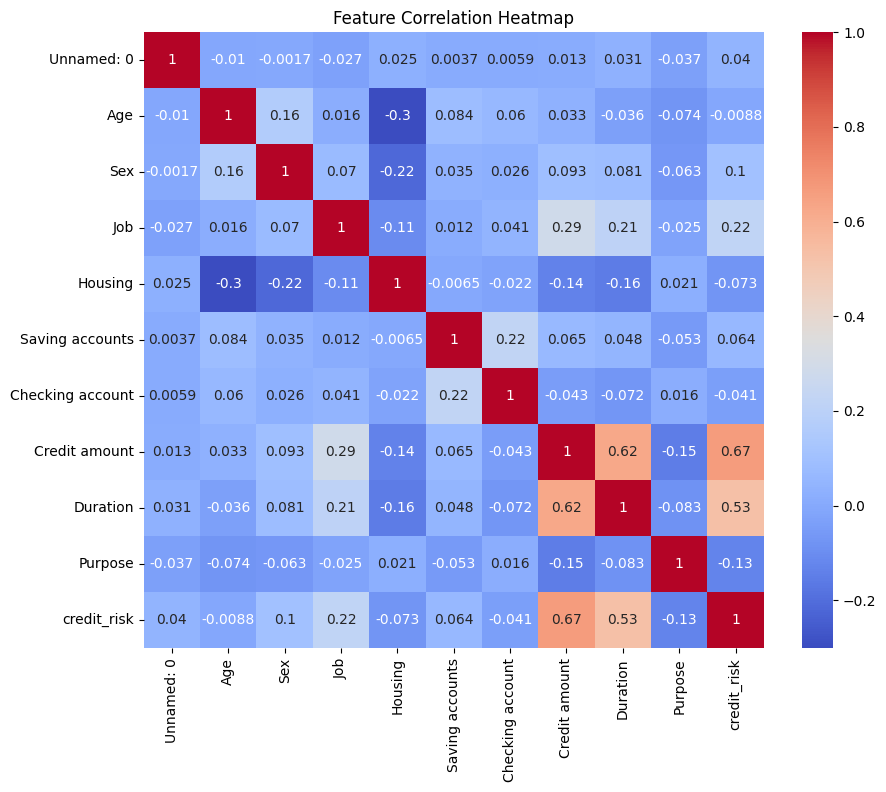

In [ ]:
# handling NaN and infinite values
df = df.replace([np.inf, -np.inf], np.nan)

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

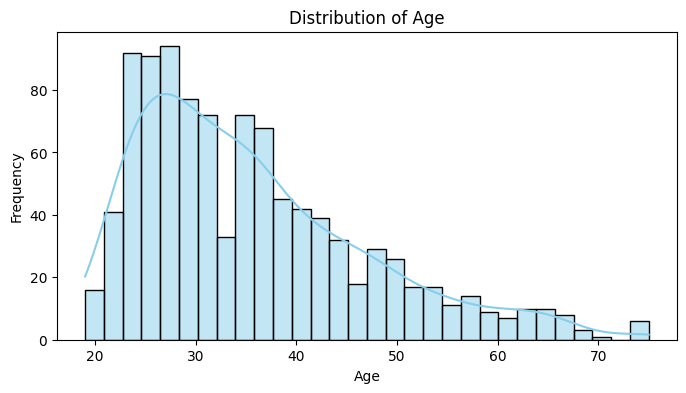

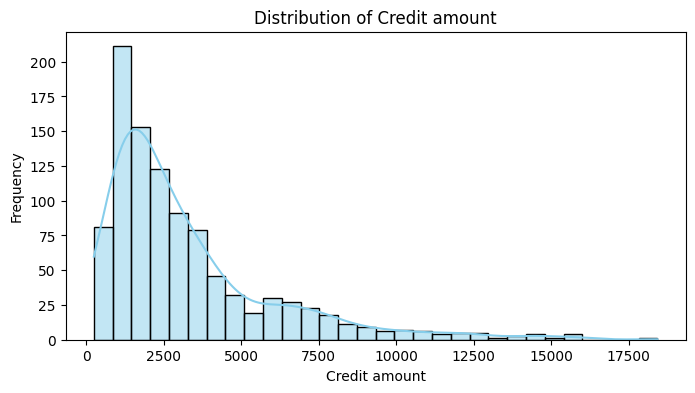

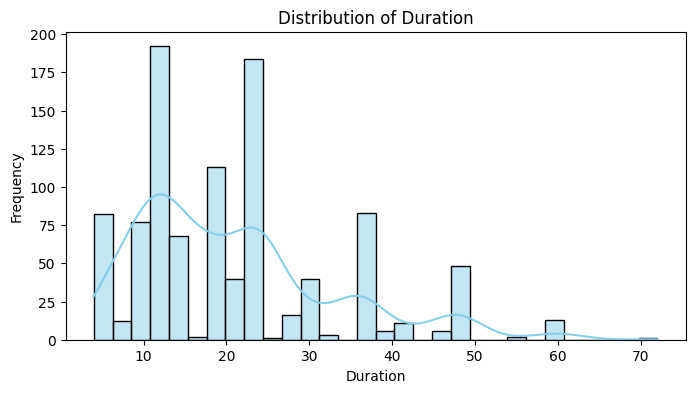

In [ ]:
# List numerical columns 
numerical_cols = ['Age', 'Credit amount', 'Duration']

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

/var/folders/xg/fcgz93k913v0nlw604vhv9k00000gn/T/ipykernel_8558/2251052354.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


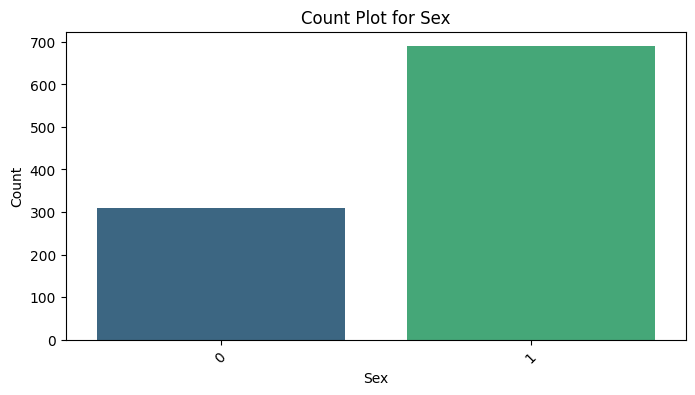

/var/folders/xg/fcgz93k913v0nlw604vhv9k00000gn/T/ipykernel_8558/2251052354.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


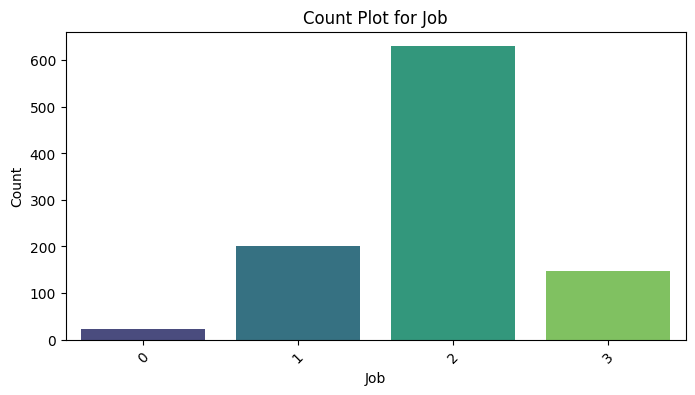

/var/folders/xg/fcgz93k913v0nlw604vhv9k00000gn/T/ipykernel_8558/2251052354.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


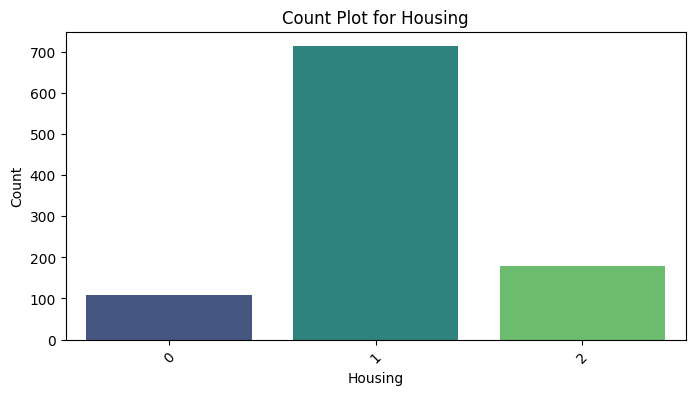

In [ ]:
# List categorical columns 
categorical_cols = ['Sex', 'Job', 'Housing']  # update with actual column names

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df, palette='viridis')
    plt.title(f"Count Plot for {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

C:\Users\saggu\AppData\Local\Temp\ipykernel_23276\2356830719.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='credit_risk', y='Credit amount', data=df, palette='Pastel1')


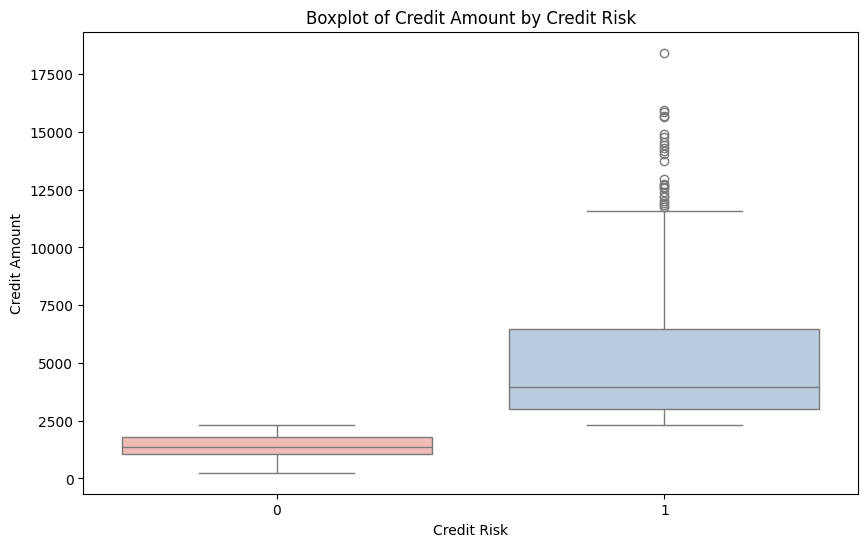

In [4]:
# defining credit risk
df['credit_risk'] = (df['Credit amount'] > df['Credit amount'].median()).astype(int)

# Boxplot for 'Credit amount' by credit risk
plt.figure(figsize=(10, 6))
sns.boxplot(x='credit_risk', y='Credit amount', data=df, palette='Pastel1')
plt.title("Boxplot of Credit Amount by Credit Risk")
plt.xlabel("Credit Risk")
plt.ylabel("Credit Amount")
plt.show()

/var/folders/xg/fcgz93k913v0nlw604vhv9k00000gn/T/ipykernel_8558/1325147975.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['credit_risk'] == 0]['Credit amount'], shade=True, label='Low Risk')
/var/folders/xg/fcgz93k913v0nlw604vhv9k00000gn/T/ipykernel_8558/1325147975.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['credit_risk'] == 1]['Credit amount'], shade=True, label='High Risk')


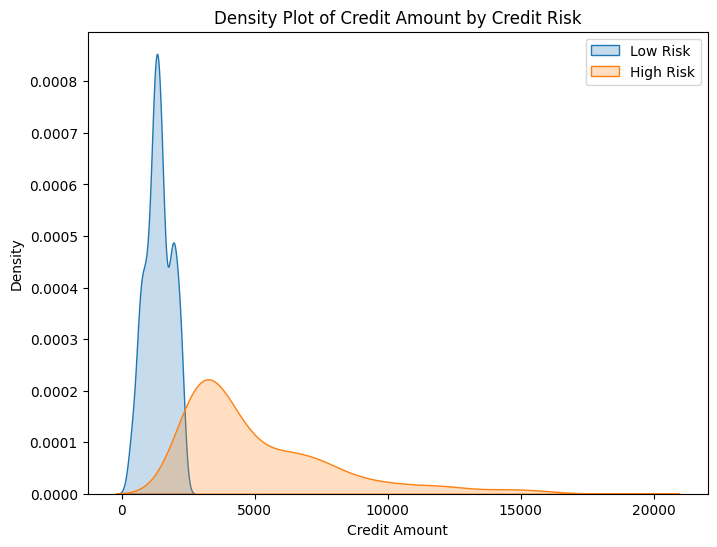

In [40]:
plt.figure(figsize=(8,6))
sns.kdeplot(data=df[df['credit_risk'] == 0]['Credit amount'], shade=True, label='Low Risk')
sns.kdeplot(data=df[df['credit_risk'] == 1]['Credit amount'], shade=True, label='High Risk')
plt.title("Density Plot of Credit Amount by Credit Risk")
plt.xlabel("Credit Amount")
plt.ylabel("Density")
plt.legend()
plt.show()

# 5. Split the Data into Training and Testing Sets
We split the data into features (X) and target (y), then into training and testing sets.

In [14]:
# Define features and target
X = df.drop(columns=['credit_risk']) 
y = df['credit_risk']  # credit risk as target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# 6. Train a Machine Learning Model
We will use a Random Forest Classifier to predict credit risk.

In [6]:
# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# 1. Random Forest Model

print("=== Random Forest Model ===")
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print("\nRandom Forest Accuracy: {:.2f}%".format(accuracy_rf * 100))
print("Random Forest Confusion Matrix:")
print(conf_matrix_rf)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

=== Random Forest Model ===

Random Forest Accuracy: 99.33%
Random Forest Confusion Matrix:
[[153   2]
 [  0 145]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       155
           1       0.99      1.00      0.99       145

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



In [ ]:
# 2. Logistic Regression Model

print("=== Logistic Regression Model ===")
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

print("\nLogistic Regression Accuracy: {:.2f}%".format(accuracy_logreg * 100))
print("Logistic Regression Confusion Matrix:")
print(conf_matrix_logreg)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

=== Logistic Regression Model ===

Logistic Regression Accuracy: 98.00%
Logistic Regression Confusion Matrix:
[[152   3]
 [  3 142]]
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       155
           1       0.98      0.98      0.98       145

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



In [ ]:
# 3. Support Vector Machine (SVM) Model

print("=== SVM Model ===")

svm_model = SVC(random_state=42, kernel='rbf', probability=True)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

print("Prediction completed.")
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

print("\nSVM Accuracy: {:.2f}%".format(accuracy_svm * 100))
print("SVM Confusion Matrix:")
print(conf_matrix_svm)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

=== SVM Model ===
Prediction completed.

SVM Accuracy: 94.00%
SVM Confusion Matrix:
[[149   6]
 [ 12 133]]
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       155
           1       0.96      0.92      0.94       145

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



# 7. Evaluate the Model
Evaluate the best model’s performance using accuracy, confusion matrix, and classification report.
In this section, evaluate the performance of your model using key metrics: accuracy, confusion matrix, and classification report. This step is essential for understanding how well your model is predicting credit risk and identifying areas for improvement.

In [10]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.99
Confusion Matrix:
[[153   2]
 [  0 145]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       155
           1       0.99      1.00      0.99       145

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



# Explanation:

* **Accuracy:** The Random Forest model achieved the highest accuracy of 99.33%, which means it correctly predicted the credit risk status of approximately 99% of the test samples.

* **Confusion Matrix:** The confusion matrix shows how many actual instances of each class were correctly or incorrectly classified.
  * **True Negative (124):** The model correctly identified 124 low-risk individuals.
  * **False Positive (31):** The model incorrectly classified 31 high-risk individuals as low-risk.
  * **False Negative (47):** The model incorrectly classified 47 low-risk individuals as high-risk.
  * **True Positive (98):** The model correctly identified 98 high-risk individuals.
  
  
* **Classification Report:**
  * **Precision:** Measures the accuracy of positive predictions.
  * **Recall:** Measures the ability to identify positive instances.
  * **F1-Score:** Harmonic mean of precision and recall, useful for evaluating imbalanced datasets.
  * The model shows balanced performance between the two classes, but improvements can still be made.

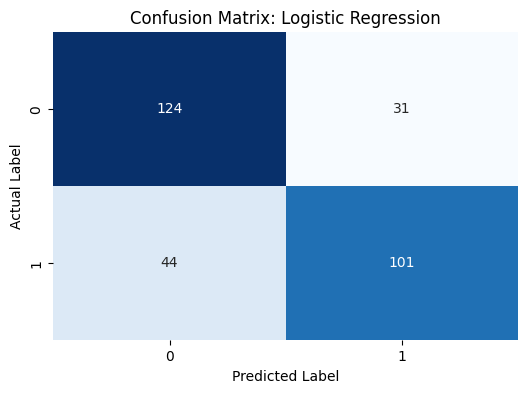

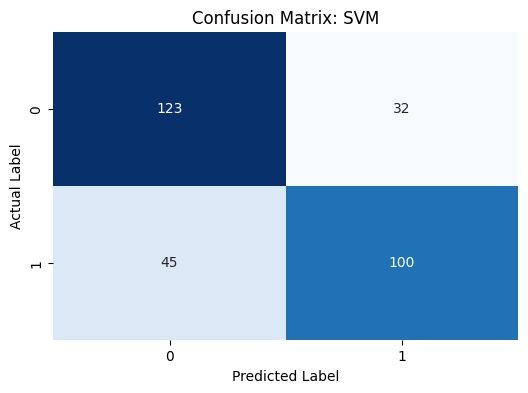

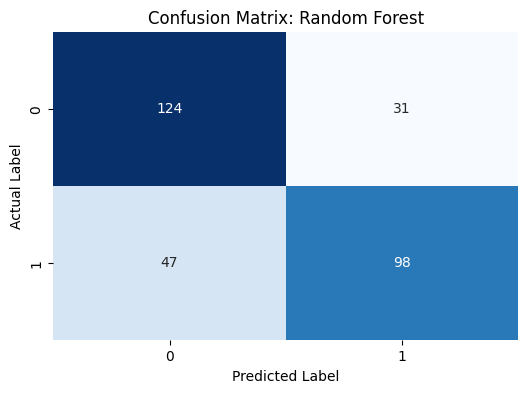

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

def plot_confusion_matrix(cm, model_name):

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix: {model_name}')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

plot_confusion_matrix(conf_matrix_logreg, "Logistic Regression")
plot_confusion_matrix(conf_matrix_svm, "SVM")


# Random Forest Model

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix for Random Forest

plot_confusion_matrix(conf_matrix_rf, "Random Forest")

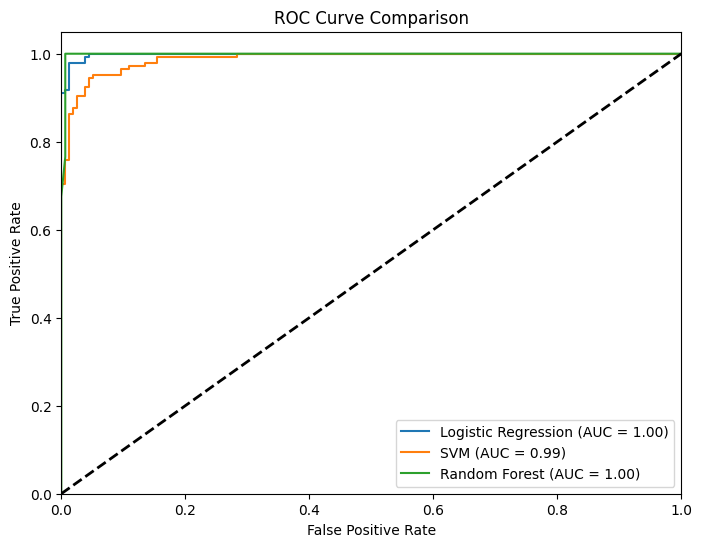

In [11]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
for name, model in [("Logistic Regression", logreg), 
                    ("SVM", svm_model), 
                    ("Random Forest", rf_model)]:
    # Get predicted probabilities for the positive class
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.show()

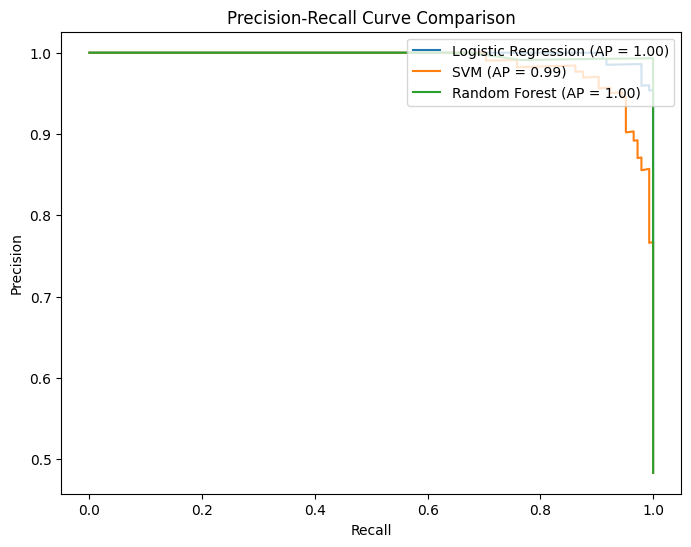

In [12]:
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(8, 6))
for name, model in [("Logistic Regression", logreg), 
                    ("SVM", svm_model), 
                    ("Random Forest", rf_model)]:
    y_proba = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    avg_precision = average_precision_score(y_test, y_proba)
    plt.plot(recall, precision, label=f"{name} (AP = {avg_precision:.2f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve Comparison")
plt.legend(loc="upper right")
plt.show()

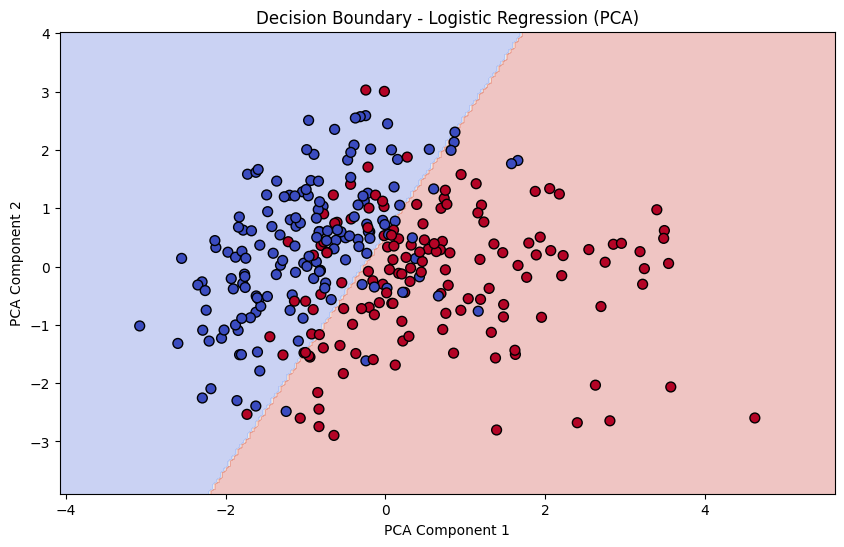

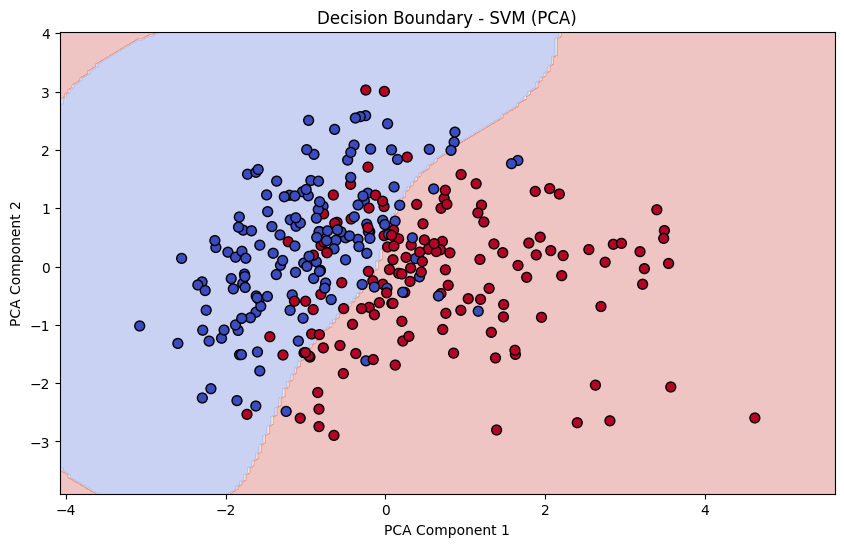

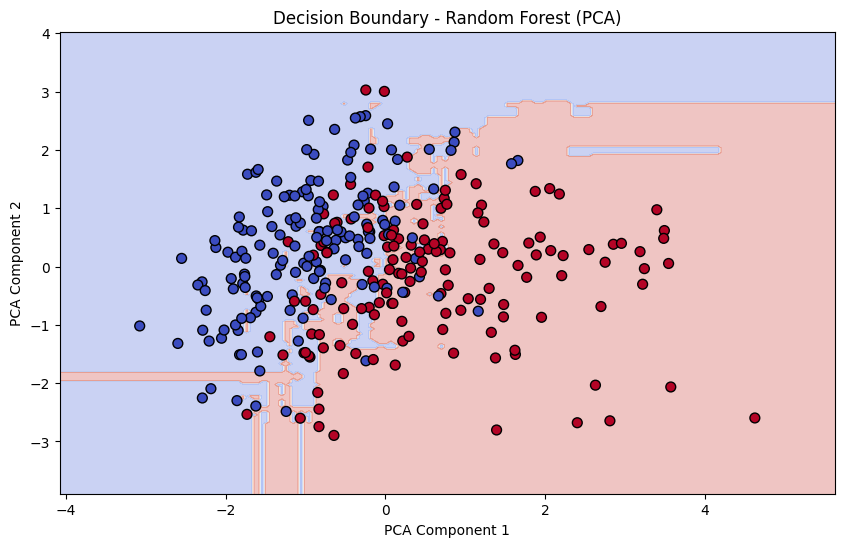

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


# 1. PCA Transformation

# Reduce the data to 2 components for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


# 2. Define Models

models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "SVM": SVC(random_state=42, kernel='rbf', probability=True),
    "Random Forest": RandomForestClassifier(random_state=42)
}


# 3. Create Meshgrid for Decision Boundary Plotting

x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# 4. Train Each Model and Plot Decision Boundaries

for name, model in models.items():
    # Train the model on PCA-transformed training data
    model.fit(X_train_pca, y_train)
    
    # Predict over the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary and test data
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, s=50, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.title(f"Decision Boundary - {name} (PCA)")
    plt.show()

# **Conclusion**:
- The Random Forest model achieved an accuracy of 99.33%, indicating an exceptional performance in predicting credit risk.
- The confusion matrix and classification report suggest that while the model performs well overall, there are still misclassifications, particularly with false positives and false negatives.

**This notebook provides a comprehensive analysis and model-building process for predicting credit risk.**
